### Título: Proyecto final de asignatura (3: Preprocesamiento específico para Clasificación)
### Autores: Grupo 2 
### Asignatura: Aprendizaje Automático

### Importamos las bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score


### Importamos el csv

In [21]:
CSV = "DF1.0_proy_escuela_eda_general.csv"

df = pd.read_csv(CSV)

### Tamaño CSV

In [22]:
# Dimensiones del dataset
dimensiones = df.shape
print(f"Dimensiones del dataset: {dimensiones[0]} filas y {dimensiones[1]} columnas")

Dimensiones del dataset: 548 filas y 37 columnas


### Mostramos el gráfico de correlaciones

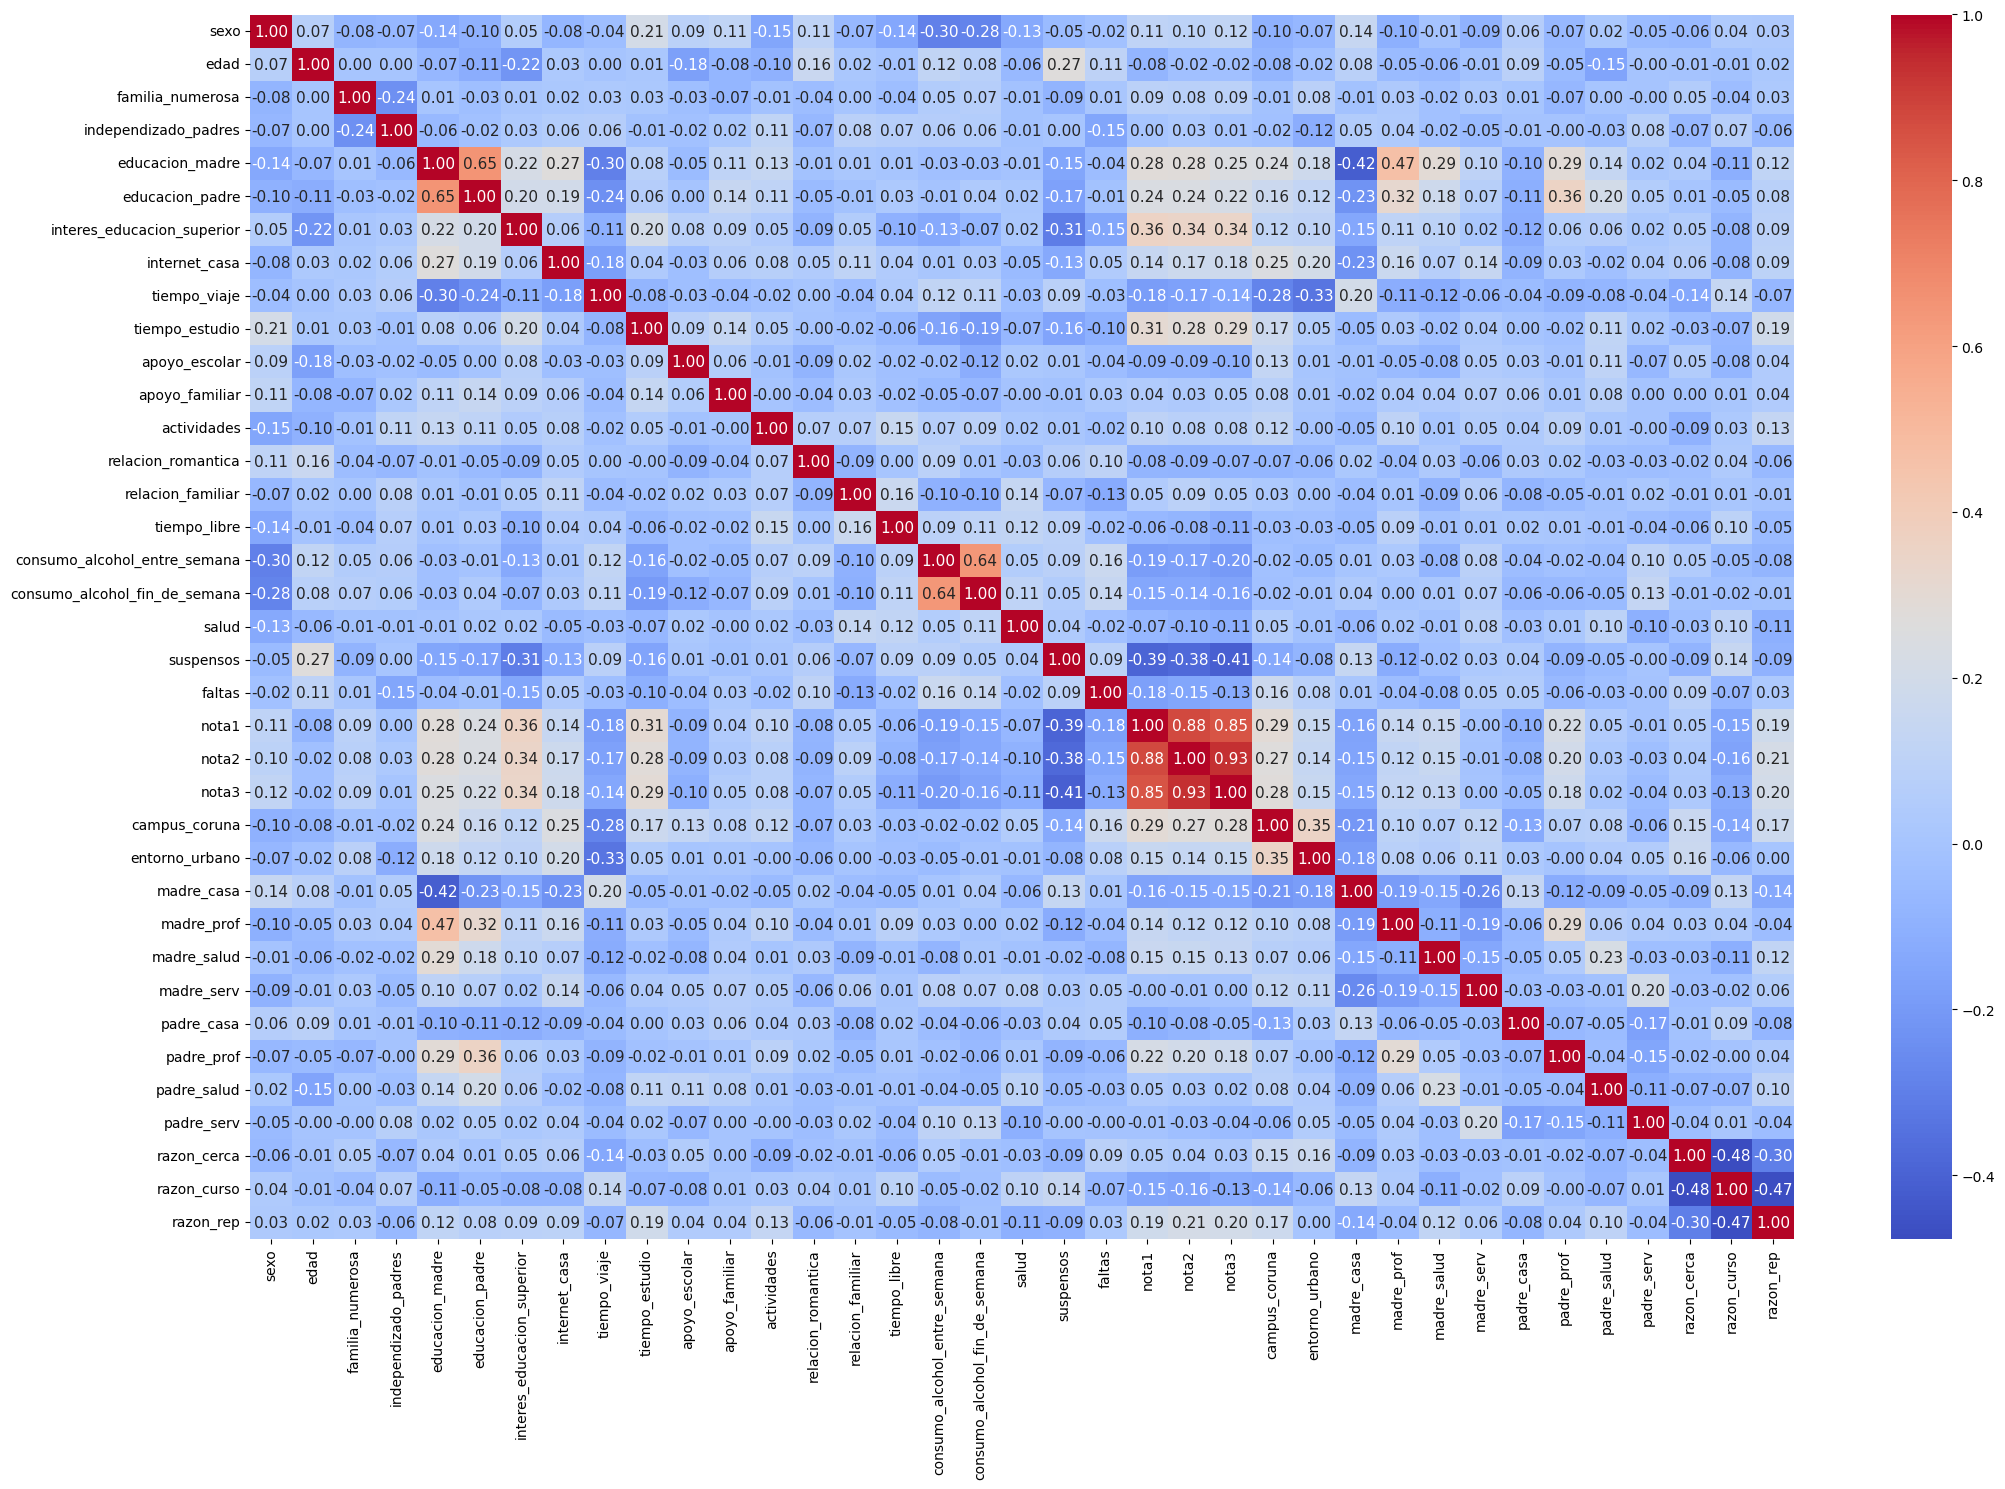

In [23]:
# Hacemos otro gráfico de correlación con los datos estandarizados
corr_matrix = df.corr()

# Ajustar el tamaño de la figura antes de dibujar el mapa de calor
plt.figure(figsize=(22, 15))

# Dibujar el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Formato de los números
    annot_kws={"size": 11}  # Tamaño de la fuente de los números
)

# Ajustar automáticamente los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [24]:
# Crear la variable objetivo
percentil_90 = np.percentile(df['nota3'], 90)
df['beca'] = (df['nota3'] > percentil_90).astype(int)
df.head()

,sexo,edad,familia_numerosa,independizado_padres,educacion_madre,educacion_padre,interes_educacion_superior,internet_casa,tiempo_viaje,tiempo_estudio,...,madre_salud,madre_serv,padre_casa,padre_prof,padre_salud,padre_serv,razon_cerca,razon_curso,razon_rep,beca
0,-1.189158,-1.424965,1.578115,0.376386,1.300376,0.628064,0.347353,0.566111,-0.750471,1.270781,...,-0.288104,-0.509676,-0.269086,-0.24487,-0.178928,1.599513,1.811422,-0.863263,-0.543607,0
1,0.840931,0.963050,-0.633668,0.376386,-0.490091,-0.287306,0.347353,0.566111,0.606817,1.270781,...,-0.288104,1.962029,-0.269086,-0.24487,-0.178928,-0.625190,1.811422,-0.863263,-0.543607,0
2,-1.189158,0.167045,-0.633668,0.376386,0.405142,-0.287306,0.347353,0.566111,-0.750471,-1.130557,...,-0.288104,1.962029,-0.269086,-0.24487,-0.178928,1.599513,-0.552052,1.158396,-0.543607,0
3,0.840931,0.963050,-0.633668,0.376386,1.300376,1.543434,0.347353,0.566111,-0.750471,0.070112,...,3.470968,-0.509676,-0.269086,-0.24487,5.588854,-0.625190,-0.552052,-0.863263,1.839565,0
4,-1.189158,1.759054,-0.633668,0.376386,1.300376,-0.287306,0.347353,0.566111,0.606817,0.070112,...,3.470968,-0.509676,-0.269086,-0.24487,-0.178928,-0.625190,-0.552052,1.158396,-0.543607,0


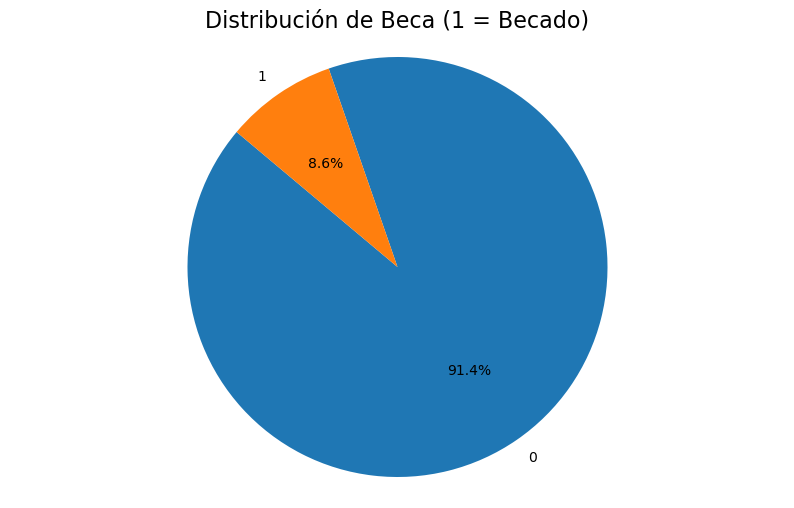

In [25]:
import matplotlib.pyplot as plt

# Calcular la distribución de la columna 'beca'
beca_counts = df['beca'].value_counts()

# Crear el gráfico de tarta
plt.figure(figsize=(10, 6))
plt.pie(beca_counts, labels=beca_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Beca (1 = Becado)', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico de tarta sea circular
plt.show()

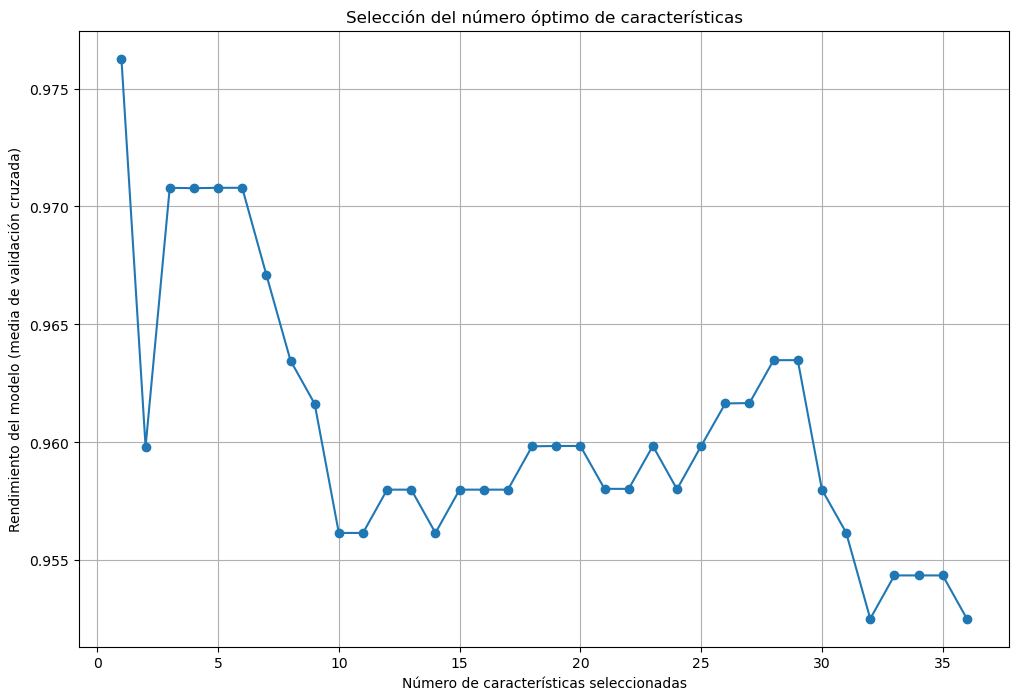

Características seleccionadas: Index(['tiempo_estudio', 'nota1', 'nota2', 'razon_rep'], dtype='object')


In [26]:
# Seleccionar las variables con SelectKBest y f_classif

X = df.drop(['nota3', 'beca'], axis=1)  # Eliminamos 'nota3' para evitar sesgo
y = df['beca']


# Probar diferentes valores de k para SelectKBest
k_values = range(1, X.shape[1] + 1)
mean_scores = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    
    # Evaluar el rendimiento del modelo usando validación cruzada
    model = LogisticRegression()
    scores = cross_val_score(model, X_new, y, cv=5)
    mean_scores.append(scores.mean())

# Visualizar el rendimiento del modelo para diferentes valores de k
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Rendimiento del modelo (media de validación cruzada)')
plt.title('Selección del número óptimo de características')
plt.grid(True)
plt.show()

# Aplicamos SelectKBest con k=4
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(f'Características seleccionadas: {selected_features}')

In [ ]:
# Actualizar el dataframe con las características seleccionadas y la variable objetivo 'beca'
selected_features_list = selected_features.tolist() + ['beca']
df = df[selected_features_list]
df.head()

,tiempo_estudio,nota1,nota2,razon_rep,beca
0,1.270781,0.881372,0.750552,-0.543607,0
1,1.270781,0.881372,0.750552,-0.543607,0
2,-1.130557,-1.287754,-1.250920,-0.543607,0
3,0.070112,0.881372,0.083395,1.839565,0
4,0.070112,-0.203191,-0.583763,-0.543607,0


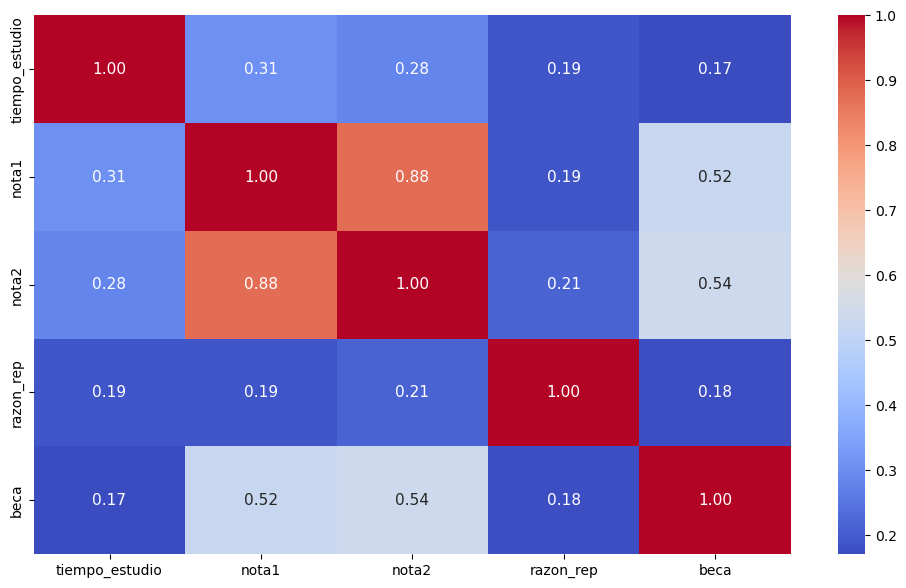

In [34]:
# Hacemos otro gráfico de correlación con los datos estandarizados
corr_matrix = df.corr()

# Ajustar el tamaño de la figura antes de dibujar el mapa de calor
plt.figure(figsize=(10, 6))

# Dibujar el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Formato de los números
    annot_kws={"size": 11}  # Tamaño de la fuente de los números
)

# Ajustar automáticamente los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

###  Guardamos el nuevo dataframe

In [35]:
# Guardamos el nuevo dataset
df.to_csv('DF3.0_proy_escuela_eda_clasificacion.csv', index=False)